* Lets manually calculate the center of clusters and find the clusters

In [34]:
from sklearn import datasets
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


def kume_merkezlerini_yeniden_hesapla(refler, noktalar, kumeler):  # recalculate the cluster centers
    for k in range(refler.shape[0]):
        refler[k] = noktalar[kumeler==k].mean(axis=0)

    return refler

def noktalari_kumelere_ata(noktalar, merkezler):  # apply points to clusters
    c=((noktalar[:, None, :] - merkezler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    return c

#calculate the all points distance to their cluster centers
def noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, merkezler, kumeler):  
    wcs = 0
    for k in range(merkezler.shape[0]):
        wcs += ((noktalar[kumeler==k] - merkezler[k])**2).sum()
    return wcs

@interact(iters=(0,40,1), seed=(0,100,1), kmeans=(2,10,1), dseed=(0,100,1))
def kviz(iters=0, seed=0, kmeans=5, dseed=40):
    wcss = []
    X, bilmiyoruz = datasets.make_blobs(random_state=dseed, centers=kmeans, n_samples=200)  #make dataset
    np.random.seed(seed)
    inds = list(range(X.shape[0]))
    noks = np.random.choice(inds, size=kmeans, replace=False)  # number of clusters
    noktalar = X
    refler = noktalar[noks]
    c=((noktalar[:, None, :] - refler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    plt.figure(figsize=(12, 8))
    plt.title("t=0: Cluster centers are randomly assigned")

    for _ in range(iters):
        if _ % 2 == 0:
            plt.title(f"t={_+1}: Step: Maximization (Cluster centers re-calculated)")
            refler = kume_merkezlerini_yeniden_hesapla(refler, noktalar, c)
        else:
            plt.title(f"t={_+1}: Step: Expectation (Samples re-assigned to clusters)")
            c = noktalari_kumelere_ata(noktalar, refler)
        wcs = noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, refler, c)
        wcss.append(wcs)
    plt.scatter(*noktalar.T, c=c, cmap='rainbow')
    plt.scatter(*refler.T, s=400, edgecolors='k', marker='*', c=range(kmeans), cmap='rainbow')
    # plt.grid()
    plt.figure(figsize=(12, 4))
    plt.plot(range(iters), wcss, marker='o')
    plt.title("Sum of squared distances to cluster centers")
   # plt.grid()
    plt.xlabel("Iterations")
    plt.ylabel("WCSS")

interactive(children=(IntSlider(value=0, description='iters', max=40), IntSlider(value=0, description='seed'),…

In [3]:
#seed=48 dseed=40 istenilen bir durum oluşmadı

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
X, y = datasets.make_blobs(n_samples=100, n_features=8, centers=5, center_box=(-40, 40))
# we have 8 features here

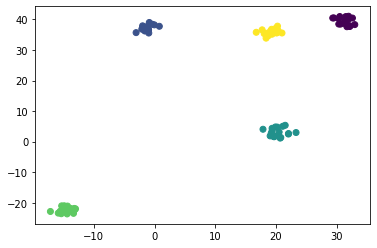

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
from sklearn. preprocessing import StandardScaler, normalize
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_normalized = normalize(X_scaled)

In [10]:
# because we have 8 features, its too much. Lets reduce dimensions
from sklearn. decomposition import PCA
pca = PCA(n_components=3)
X_norm = pca.fit_transform(X_normalized)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = ['P1', 'P2', 'P3']

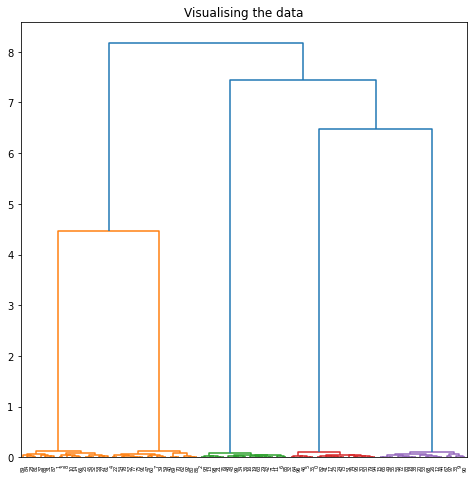

In [11]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(X_norm, method ='ward')))

In [13]:
from sklearn.cluster import AgglomerativeClustering

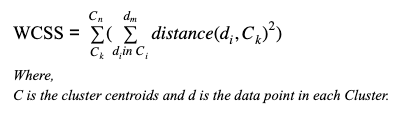

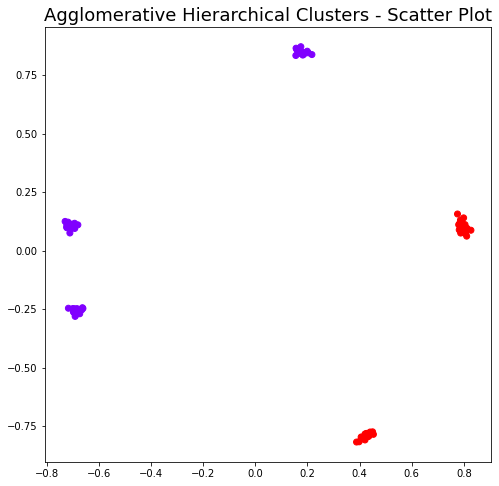

In [14]:
agg = AgglomerativeClustering(n_clusters=2)  #Lets assume that we have 2 clusters
plt.figure(figsize =(8, 8))
plt.scatter(X_norm['P1'], X_norm['P2'], c = agg.fit_predict(X_norm), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()



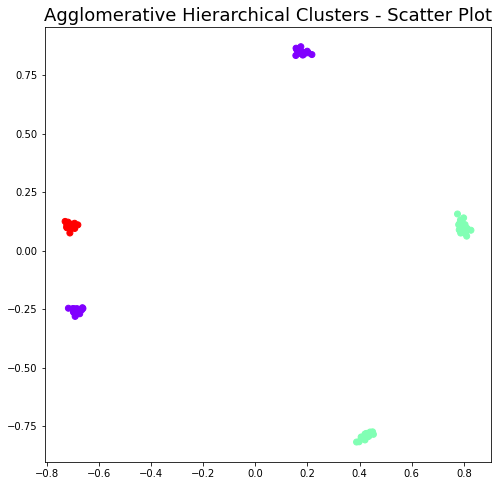

In [15]:
agg = AgglomerativeClustering(n_clusters=3)  #Lets assume that we have 3 clusters
plt.figure(figsize =(8, 8))
plt.scatter(X_norm['P1'], X_norm['P2'], c = agg.fit_predict(X_norm), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

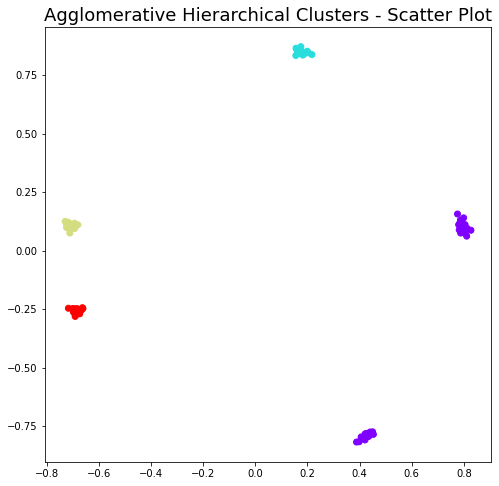

In [16]:
agg = AgglomerativeClustering(n_clusters=4)  #Lets assume that we have 4 clusters
plt.figure(figsize =(8, 8))
plt.scatter(X_norm['P1'], X_norm['P2'], c = agg.fit_predict(X_norm), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

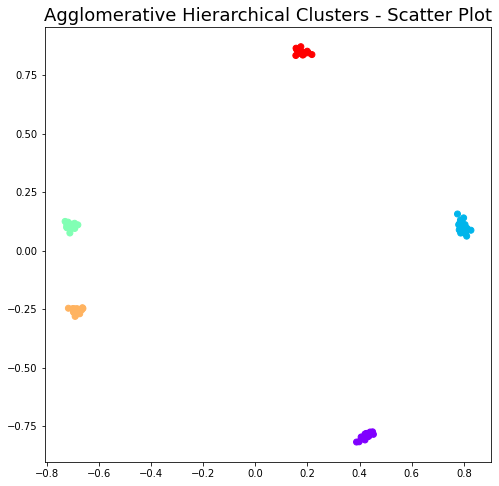

In [17]:
agg = AgglomerativeClustering(n_clusters=5)  #Lets assume that we have 5 clusters
plt.figure(figsize =(8, 8))
plt.scatter(X_norm['P1'], X_norm['P2'], c = agg.fit_predict(X_norm), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

* AgglomerativeClustering is good at some datasets
* Lets give an  example which AgglomerativeClustering is not good for predicting

In [23]:
data1, y = datasets.make_moons(n_samples=1000, noise=0.05)

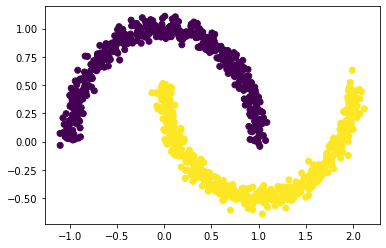

In [24]:
plt.scatter(*data1.T, c=y)

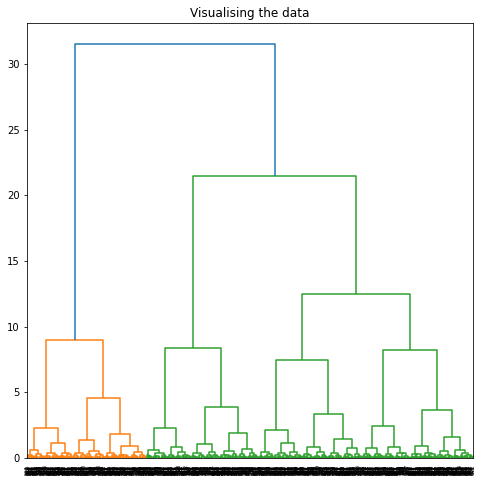

In [27]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(data1, method ='ward')))

In [25]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(data1)

AgglomerativeClustering()

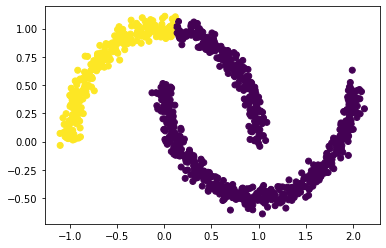

In [26]:
plt.scatter(*data1.T, c=agg.fit_predict(data1))